# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Bagus Indrawan
- **Email:** 2241720217@student.polinema.ac.id
- **ID Dicoding:** lithia

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah total pengguna sepeda?
- Bagaimana tren penggunaan sepeda berbeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("data/day.csv", delimiter=",")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv("data/hour.csv", delimiter=",")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap Gathering Data, saya membaca file CSV bernama "hour.csv" dan "day.csv" dengan menggunakan kode pd.read_csv(), kemudian mengecek kolom dan sampel data yang ada pada file tsb dengan menggunakan kode df_day.head() dan df_hour.head()

### Assessing Data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df_hour.describe()  

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada tahap Data Assessing, pertama-tama saya menggunakan .info() untuk mengecek apakah ada tipe data yang salah. Lalu, saya menggunakan .isna().sum() untuk mengecek apakah ada missing values yang terdapat dalam setiap kolom. Lalu, saya juga menggunakan .describe() untuk mengecek apakah ada inaccurate value yang terdapat pada kolom tersebut.

### Cleaning Data

**1. Mengganti tipe data kolom dteday dari object menjadi datetime**

In [10]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  df_hour[column] = pd.to_datetime(df_hour[column])
  df_day[column] = pd.to_datetime(df_day[column])
  
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Setelah melakukan data assessing, saya menemukan kejanggalan pada tipe data kolom 'dteday', yang dimana kolom tersebut seharusnya menggunakan tipe data datetime, bukan object. Sehingga, pada tahap data cleaning ini, saya menggunakan kode pd.to_datetime untuk mengganti tipe data 'dteday' yang sebelumnya object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [13]:
# Pengelompokan data berdasarkan kondisi cuaca (weathersit)
weather_usage = df_hour.groupby('weathersit')['cnt'].mean().reset_index()
weather_usage.describe()

,weathersit,cnt
count,4.000000,4.000000
mean,2.500000,141.486845
std,1.290994,59.317338
min,1.000000,74.333333
25%,1.750000,102.267794
50%,2.500000,143.372387
75%,3.250000,182.591438
max,4.000000,204.869272


In [14]:
# Pengelompokan data berdasarkan hari kerja (workingday) dan jam (hr)
workday_hourly_usage = df_hour.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()
workday_hourly_usage.describe()

,workingday,hr,cnt
count,48.000000,48.000000,48.000000
mean,0.500000,11.500000,186.373981
std,0.505291,6.995439,142.576381
min,0.000000,0.000000,4.942553
25%,0.000000,5.750000,65.424285
50%,0.500000,11.500000,173.181254
75%,1.000000,17.250000,291.240239
max,1.000000,23.000000,525.290581


**Insight:**
- Rata-rata jumlah pengguna sepeda untuk semua kategori cuaca adalah 141.49. Ini menunjukkan bahwa secara keseluruhan, sekitar 141 sepeda disewa per jam di berbagai kondisi cuaca.
-  Dalam waktu 24 jam, rata-rata pengguna sepeda sebesar 186.37 pengguna sepeda per jam. Ini menunjukkan bahwa pada umumnya, ada sekitar 186 pengguna sepeda pada jam yang dicatat di data.
- Data menunjukkan bahwa jumlah pengguna sepeda memiliki rentang yang besar, yaitu rentang dari 4.94 hingga 525.29. Hal ini mungkin dipengaruhi oleh waktu tertentu, kondisi cuaca, atau apakah itu hari kerja atau libur.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\INDRA\AppData\Local\Temp\ipykernel_16360\914859784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_usage, palette='Blues_d')


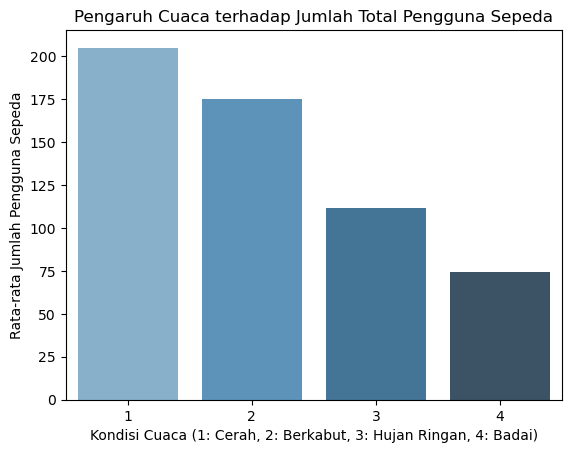

In [15]:
# Visualisasi pengaruh cuaca terhadap jumlah total pengguna sepeda
sns.barplot(x='weathersit', y='cnt', data=weather_usage, palette='Blues_d')
plt.title('Pengaruh Cuaca terhadap Jumlah Total Pengguna Sepeda')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berkabut, 3: Hujan Ringan, 4: Badai)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 2:

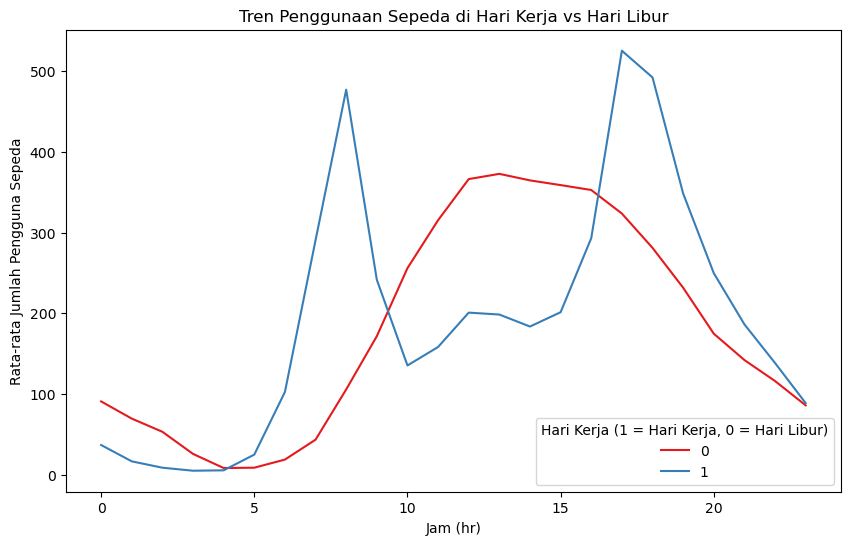

In [16]:
# Visualisasi tren penggunaan sepeda per jam di hari kerja vs hari libur
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=workday_hourly_usage, palette='Set1')

plt.title('Tren Penggunaan Sepeda di Hari Kerja vs Hari Libur')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.legend(title='Hari Kerja (1 = Hari Kerja, 0 = Hari Libur)')
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi data pada Pertanyaan 1, kita bisa lihat bahwa Jumlah Pengguna Sepeda paling banyak pada saat cuaca cerah, kemudian paling banyak nomor 2 pada saat cuaca berkabut, lalu paling banyak nomor 3 pada saat hujan ringan, dan jumlah pengguna sepeda paling sedikit pada saat cuaca badai.
- Berdasarkan hasil visualisasi data pada Pertanyaan 1, kita bisa lihat bahwa pada hari kerja/weekday, pengguna sepeda pada jam-jam tertentu naik secara signifikan, sedangkan pada hari libur/weekend, pengguna sepeda naik dan stabil saat jam siang, lalu turun lagi saat jam sore.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan hasil analisis, kita dapat simpulkan bahwa cuaca dapat memengaruhi jumlah total pengguna sepeda per jam. Hal ini dibuktikan oleh hasil visualisasi yang berarti Jumlah Pengguna Sepeda paling banyak pada saat cuaca cerah, yaitu sekitar 200++, kemudian paling banyak nomor 2 pada saat cuaca berkabut, yaitu sebesar 170++, lalu paling banyak nomor 3 pada saat hujan ringan, yaitu sebesar 110++, dan jumlah pengguna sepeda paling sedikit pada saat cuaca badai, yaitu sebesar 70++.

- Conclution pertanyaan 2 : Berdasarkan hasil analisis, kita dapat simpulkan bahwa tren penggunaan sepeda antara hari kerja dan hari libur di setiap jam itu berbeda. Kita bisa lihat bahwa pada hari kerja/weekday, pengguna sepeda pada jam-jam tertentu naik secara signifikan, lebih tepatnya pada sekitar jam 7 pagi dan jam 5 sore, hal ini bisa terjadi karena jam-jam tersebut adalah jam yang dimana kebanyakan orang berangkat dan pulang kerja/sekolah. sedangkan pada hari libur/weekend, pengguna sepeda naik dan stabil saat jam siang, lalu turun lagi saat jam sore, hal ini bisa terjadi mungkin karena pada saat hari libur/weekend, orang-orang jadi beraktivitas di luar khususnya bersepeda saat jam siang. 